#                                First Machine Learning Project

In [86]:
#This is my firt machine learning model  which i make for predict house prize based on given data
#Any suggestion contact me at rdssjayswal@gmail.com


import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
data = pd.read_csv("./training_data/house_prize_num.csv")
data.head()


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [89]:
data = data.drop(['Date','id','condition of the house','grade of the house','Built Year','Renovation Year','Postal Code','Lattitude','Longitude','living_area_renov','lot_area_renov','Number of schools nearby',
 'Distance from the airport'],axis='columns')

In [90]:
data.isnull().sum()  #cheaking null values
data.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,Area of the house(excluding basement),Area of the basement,Price
0,5,2.50,3650,9050,2.0,0,4,3370,280,2380000
1,4,2.50,2920,4000,1.5,0,0,1910,1010,1400000
2,5,2.75,2910,9480,1.5,0,0,2910,0,1200000
3,4,2.50,3310,42998,2.0,0,0,3310,0,838000
4,3,2.00,2710,4500,1.5,0,0,1880,830,805000


In [91]:
data['Area of the house']= data['Area of the house(excluding basement)']+data['Area of the basement']+data['lot area']
data=data.drop(['Area of the basement','Area of the house(excluding basement)','lot area','living area','waterfront present','number of views'],axis='columns')
data.head()

,number of bedrooms,number of bathrooms,number of floors,Price,Area of the house
0,5,2.50,2.0,2380000,12700
1,4,2.50,1.5,1400000,6920
2,5,2.75,1.5,1200000,12390
3,4,2.50,2.0,838000,46308
4,3,2.00,1.5,805000,7210


In [92]:
data['price_per_sqft']=data['Price'] /data['Area of the house']
data.head()

,number of bedrooms,number of bathrooms,number of floors,Price,Area of the house,price_per_sqft
0,5,2.50,2.0,2380000,12700,187.401575
1,4,2.50,1.5,1400000,6920,202.312139
2,5,2.75,1.5,1200000,12390,96.852300
3,4,2.50,2.0,838000,46308,18.096225
4,3,2.00,1.5,805000,7210,111.650485


In [93]:
data['price_per_sqft'].describe()

count    14620.000000
mean        59.344000
std         44.988648
min          0.503607
25%         28.047878
50%         46.779861
75%         78.125000
max        386.221294
Name: price_per_sqft, dtype: float64

In [94]:
data['BHK']=(data['number of bedrooms']+data['number of bathrooms']+data['number of floors'])//3
data = data.drop(['number of bedrooms','number of bathrooms','number of floors'],axis='columns')


In [95]:
data.head()

,Price,Area of the house,price_per_sqft,BHK
0,2380000,12700,187.401575,3.0
1,1400000,6920,202.312139,2.0
2,1200000,12390,96.852300,3.0
3,838000,46308,18.096225,2.0
4,805000,7210,111.650485,2.0


In [104]:
def remove_pps_outliers(data):
    data_out = pd.DataFrame()
    for key, subdata in data.groupby('BHK'):
        m = np.mean(subdata.price_per_sqft)
        st = np.std(subdata.price_per_sqft)
        reduced_data = subdata[(subdata.price_per_sqft>(m-st)) & (subdata.price_per_sqft<=(m+st))]
        data_out = pd.concat([data_out,reduced_data],ignore_index=True)
    return data_out

In [120]:
data = remove_pps_outliers(data)
data.head()
data=data.drop(['BHK'],axis='columns')


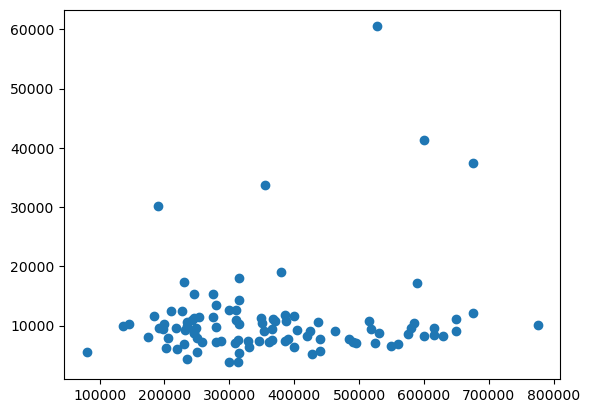

In [109]:
plt.scatter(data['Price'].head(100),data['Area of the house'].head(100))

In [115]:
def plot_rates_for_BHK(data,BHK):
    bhk2 = data[ (data.BHK==2)]
    bhk3 = data[ (data.BHK==3)]
    bhk4 = data[ (data.BHK==4)]
    plt.scatter(bhk2['Area of the house'],bhk2['Price'] ,marker='o' ,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3['Area of the house'],bhk3['Price'] , marker='+', color='green',label='3 BHK', s=50)
    plt.scatter(bhk4['Area of the house'],bhk4['Price'], color='red' , marker='x',label='4 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(BHK)
    plt.legend()

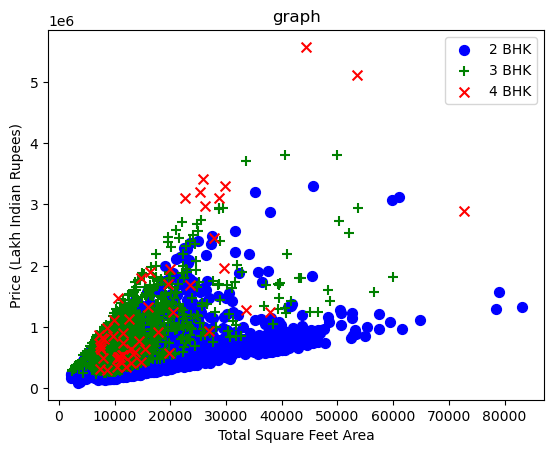

In [117]:
plot_rates_for_BHK(data,'graph')

In [134]:
feature= data.drop(['Price','price_per_sqft'],axis='columns')
label =  data['Price']
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2582 entries, 0 to 2581
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Area of the house  2582 non-null   int64
dtypes: int64(1)
memory usage: 20.3 KB


In [135]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(feature , label , test_size = 0.2 , random_state = 10)

In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [138]:
accuracy = model.score(X_test,y_test)
accuracy = str(accuracy).replace("0." , "")[:2]
print(f"Accuracy : {accuracy}%")

Accuracy : 44%


In [139]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), feature, label, cv=cv)

array([ 0.43547828,  0.47277757,  0.44646172,  0.45045223, -3.60692162])

In [148]:
def predict_price(Area_of_the_house): 
    x = np.zeros(len(feature.columns))
    x[0]=Area_of_the_house
    return model.predict([x])[0]

In [ ]:
p=True
while(p):
    choice=int(input("what you want:-\npress 1 to predict.\npress 2 to exit.\n"))
    if choice==1:
        area=int(input("please enter area"))
        price=predict_price(area)
        print(f"price of the area you choosen is {price}")
    else:
        p= False


In [ ]:
# there are a confusion if you are reviewing this project this you think about it i think it is happen pnly in my pc
#when i run above cell and not enter input and run again above cell then kernal is busy for a long time 